<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-lightcurves-tess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

# TESS lightcurves

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
pl.style.use("default")

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## long (30-minute) cadence 

In [2]:
#initialize LongCadence class
l = cr.LongCadence(toiid=200, sap_mask='square', aper_radius=2)

Target: TOI 200
Available sectors: [1]
Using sector=1.


## custom

Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 120.0 arcsec.


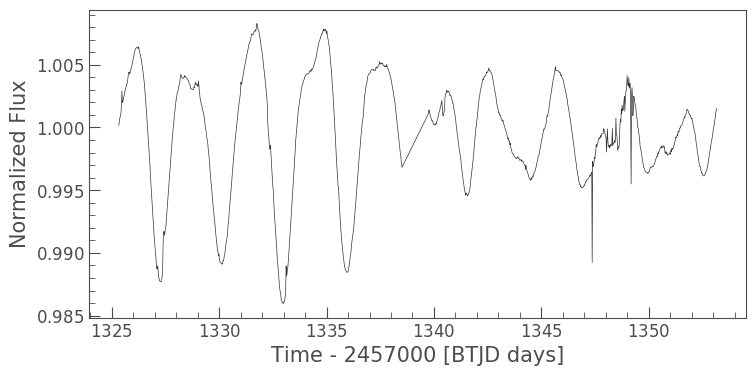

In [3]:
#make custom lightcurve
lc = l.make_custom_lc()
lc.plot();

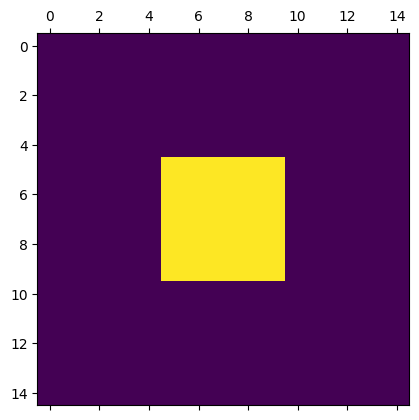

In [4]:
# show aperture mask
pl.matshow(l.aper_mask)

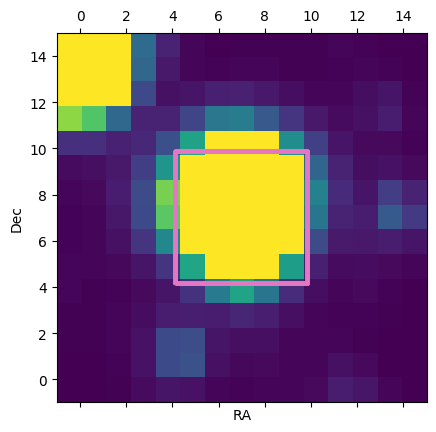

In [5]:
#show tpf with aperture mask
img = np.median(l.tpf_tesscut.flux, axis=0)
cr.plot_aperture_outline(img, mask=l.aper_mask)

### varying apertures

Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD


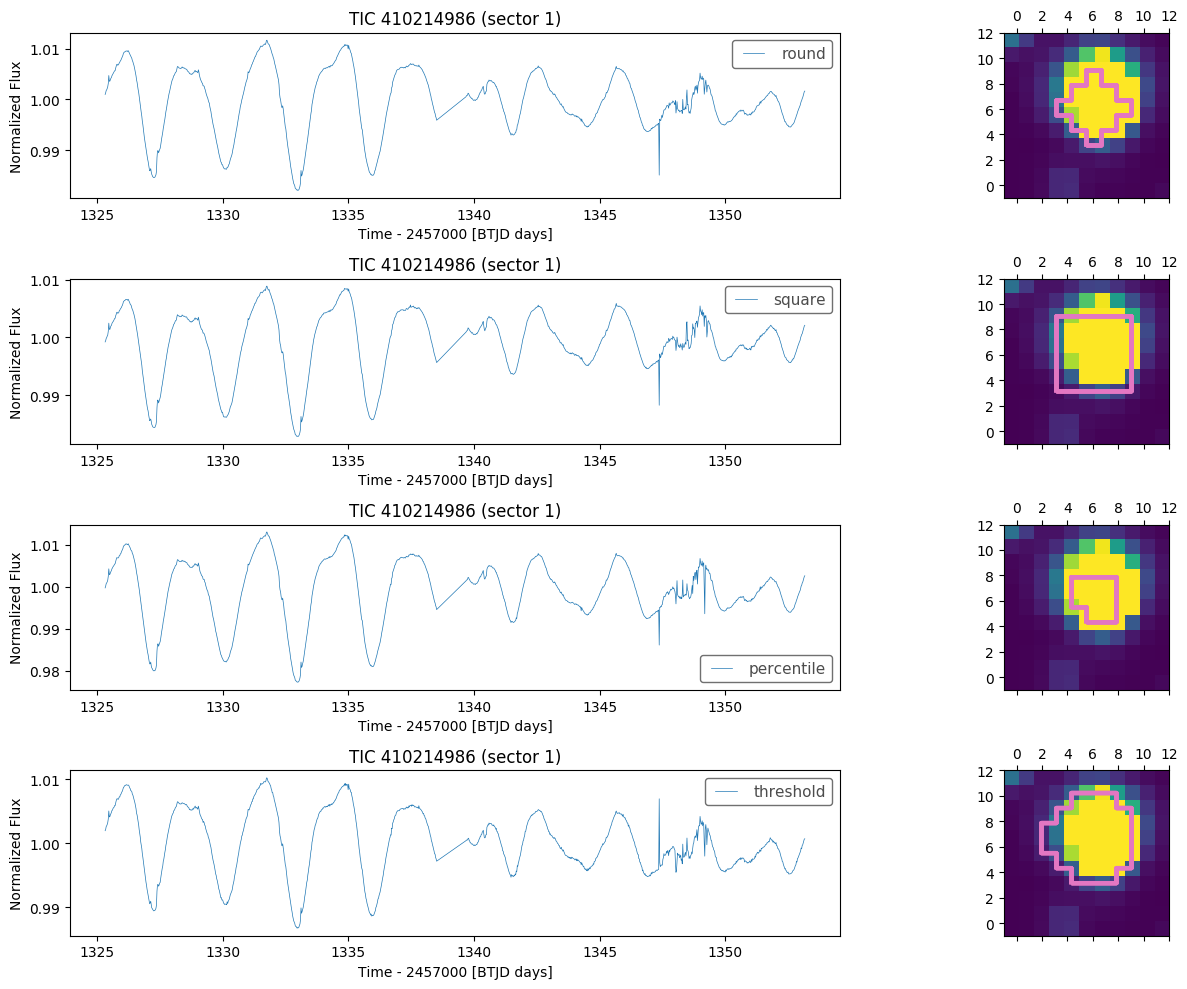

In [6]:
#custom lightcurves with varying apertures
masks = ['round','square','percentile','threshold']
kwargs = {'aper_radius': 2, 'percentile': 95, 'threshold_sigma': 5}

fig, axs = pl.subplots(len(masks),2, figsize=(15,10))

custom_lcs = {}
for n,sap_mask in enumerate(masks):
    lc = l.make_custom_lc(sap_mask=sap_mask, tpf_size=(12,12), **kwargs)
    lc.plot(ax=axs[n,0],label=sap_mask)
    custom_lcs[sap_mask] = lc
    axs[n,0].set_title(f'TIC {l.ticid} (sector {lc.sector})')
    
    tpf = l.tpf_tesscut.cutout(size=12)
    img = np.median(tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=l.aper_mask, imgwcs=tpf.wcs, ax=axs[n,1])
fig.tight_layout()

Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 3.0 arcsec.
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 60.0 arcsec.
Querying DSS2 Red (2.38 arcmin x 2.38 arcmin) archival image


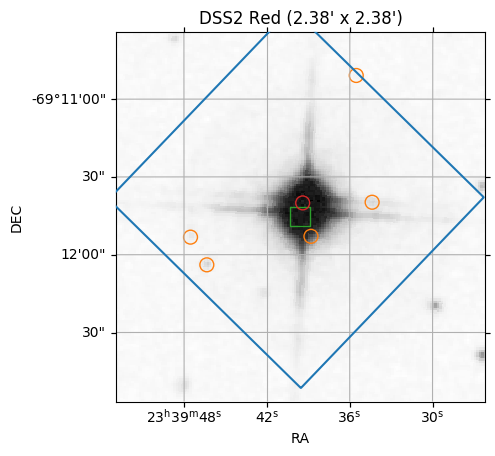

In [7]:
depth = l.toi_params['Depth (ppm)']/1e6
kmax = 1

#query target Gaia parameters
gaia_params = l.query_gaia_dr2_catalog(return_nearest_xmatch=True)

#query gaia sources 1 arcmin around the target 
gaia_sources = l.query_gaia_dr2_catalog(radius=60)

cr.plot_gaia_sources_on_survey(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

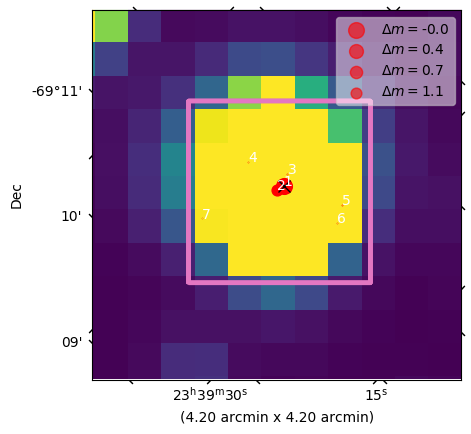

In [8]:
cr.plot_gaia_sources_on_tpf(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

### CDIPS method
* See also lightcurves-tess-cdips.ipynb

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


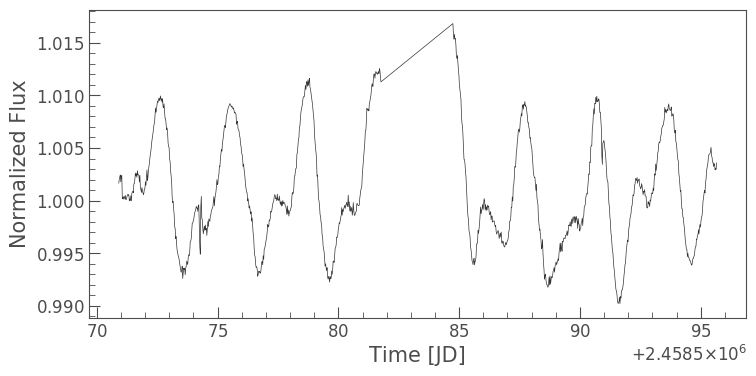

In [9]:
#get CDIPS lightcurve using a method that calls CDIPS class
l = cr.LongCadence(toiid=837)
lc = l.get_cdips_lc() 
lc.plot();

There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

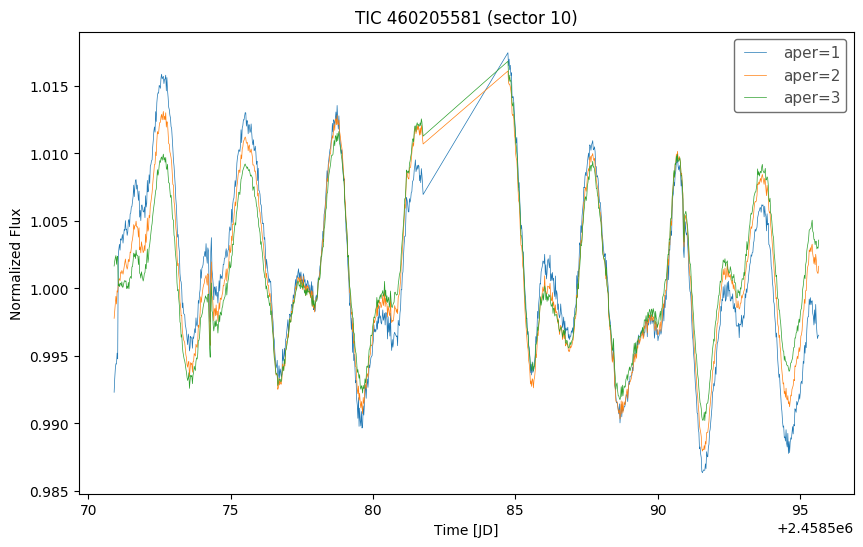

In [10]:
#vary aperture using index 1,2,3

cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_cdips_lc(sector=10, aper_idx=aper, verbose=False)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

### PATHOS method
* See also lightcurves-tess-pathos.ipynb

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


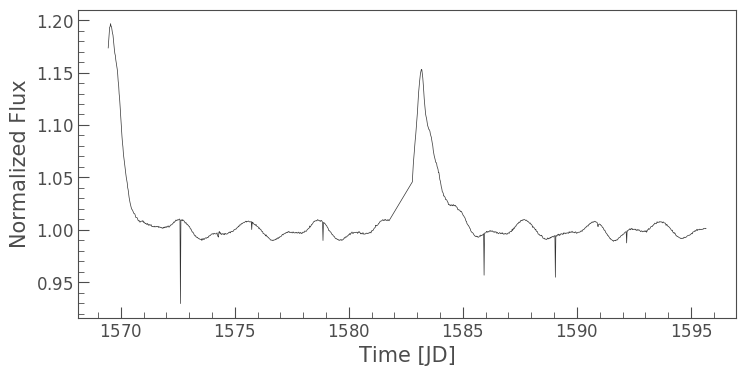

In [11]:
#get CDIPS lightcurve using a method that calls CDIPS class
l = cr.LongCadence(toiid=837)
lc = l.get_pathos_lc() 
lc.plot();

Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

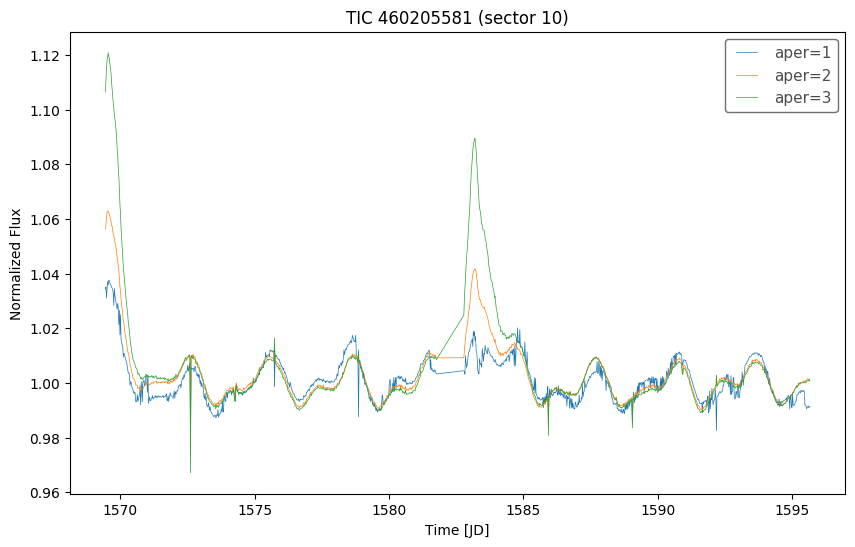

In [12]:
#vary aperture using index 1,2,3

pathos_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_pathos_lc(aper_idx=aper)
    lc.plot(ax=ax, label=f'aper={aper}')
    pathos_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

## short cadence

In [1]:
import chronos as cr

s = cr.ShortCadence(toiid=837)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Available sectors: [10, 11]
Using sector=10.


### custom

Searching targetpixelfile using lightkurve

Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Querying Gaia DR2 catalog for 157.037 -64.5052 within 120.0 arcsec.



Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

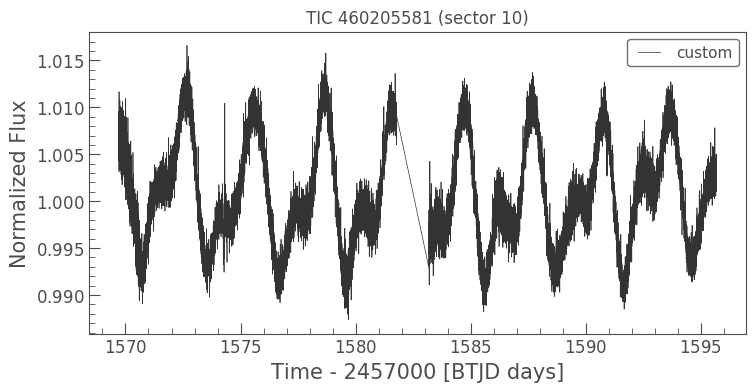

In [2]:
#make custom lc
custom_lc = s.make_custom_lc(sap_mask='pipeline')
ax = custom_lc.plot(label='custom')
ax.set_title(f'TIC {s.ticid} (sector {s.sector})')

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Brightest star is detected near the edges.
Aperture mask is placed at the center instead.



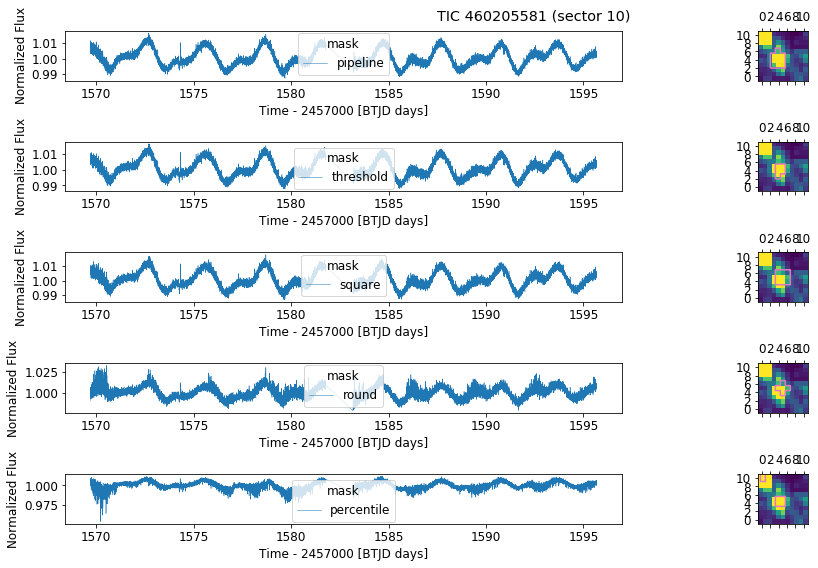

In [7]:
masks = 'pipeline threshold square round percentile'.split()
fig, axs = pl.subplots(len(masks), 2, figsize=(15,8))

kwargs = {'aper_radius': 1, 'threshold_sigma': 5, 'percentile': 95}

for n,mask in enumerate(masks):
    custom_lc = s.make_custom_lc(sap_mask=mask, **kwargs)
    _ = custom_lc.plot(ax=axs[n,0], label=mask)
    axs[n,0].legend(title='mask')
    
    img = np.median(s.tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=s.aper_mask, ax=axs[n,1])
#     axs[n,1].set_title(mask)
fig.suptitle(f'TIC {s.ticid} (sector {s.sector})')
fig.tight_layout()

### pipeline lc: SAP and PDCSAP

Searching lightcurvefile for TIC 460205581 (sector 10)


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

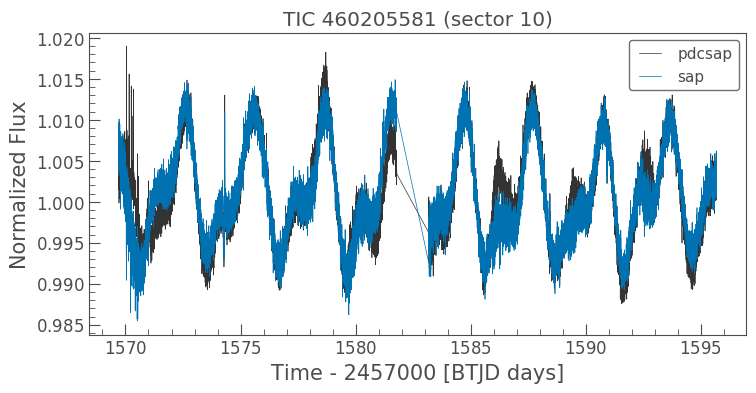

In [8]:
#get pipeline lc
pdcsap = s.get_lc(lctype='pdcsap')
ax = pdcsap.plot(label='pdcsap')

sap = s.get_lc(lctype='sap')
sap.plot(ax=ax, label='sap')
ax.set_title(f'TIC {s.ticid} (sector {pdcsap.sector})')

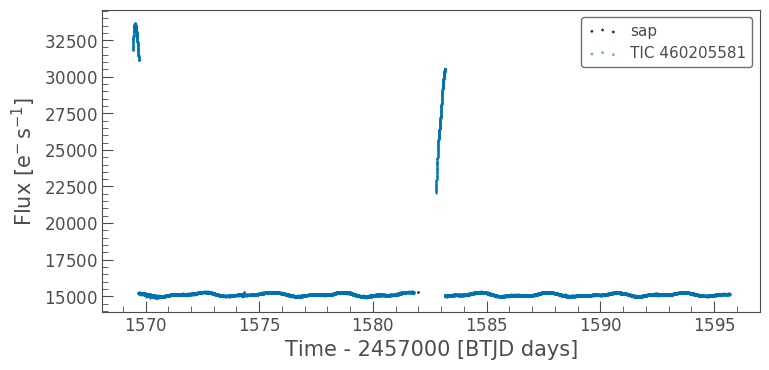

In [10]:
#note that these two are identical
ax = s.lc_sap.bin(100).scatter(label='sap') #sap
s.tpf.to_lightcurve(aperture_mask='pipeline').scatter(ax=ax, alpha=0.5) #also sap

## See also
* examples-stellar-rotation-gls.ipynb